In [ ]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_theme()

In [ ]:
# ============================================================
# 2. LOAD DATASET
# ============================================================

df = pd.read_csv("jumlah_capaian_penanganan_sampah_di_kota_bandung.csv")

print("HEAD DATA:")
display(df.head())

print("\nINFO DATA:")
df.info()

print("\nDESKRIPSI STATISTIK:")
display(df.describe())

print("\nJUMLAH MISSING VALUE:")
print(df.isna().sum())

HEAD DATA:


,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bulan,jumlah_sampah,satuan,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,JANUARI,28695.810,TON,2017
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,FEBRUARI,25235.730,TON,2017
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,MARET,27581.190,TON,2017
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,APRIL,29664.735,TON,2017
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,MEI,34637.092,TON,2017



INFO DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       96 non-null     int64  
 1   kode_provinsi            96 non-null     int64  
 2   nama_provinsi            96 non-null     object 
 3   bps_kode_kabupaten_kota  96 non-null     int64  
 4   bps_nama_kabupaten_kota  96 non-null     object 
 5   bulan                    96 non-null     object 
 6   jumlah_sampah            96 non-null     float64
 7   satuan                   96 non-null     object 
 8   tahun                    96 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 6.9+ KB

DESKRIPSI STATISTIK:


,id,kode_provinsi,bps_kode_kabupaten_kota,jumlah_sampah,tahun
count,96.000000,96.0,96.0,96.000000,96.000000
mean,48.500000,32.0,3273.0,36851.510729,2020.500000
std,27.856777,0.0,0.0,4969.481349,2.303316
min,1.000000,32.0,3273.0,22919.400000,2017.000000
25%,24.750000,32.0,3273.0,33850.621000,2018.750000
50%,48.500000,32.0,3273.0,38395.112000,2020.500000
75%,72.250000,32.0,3273.0,40671.701000,2022.250000
max,96.000000,32.0,3273.0,43576.848000,2024.000000



JUMLAH MISSING VALUE:
id                         0
kode_provinsi              0
nama_provinsi              0
bps_kode_kabupaten_kota    0
bps_nama_kabupaten_kota    0
bulan                      0
jumlah_sampah              0
satuan                     0
tahun                      0
dtype: int64


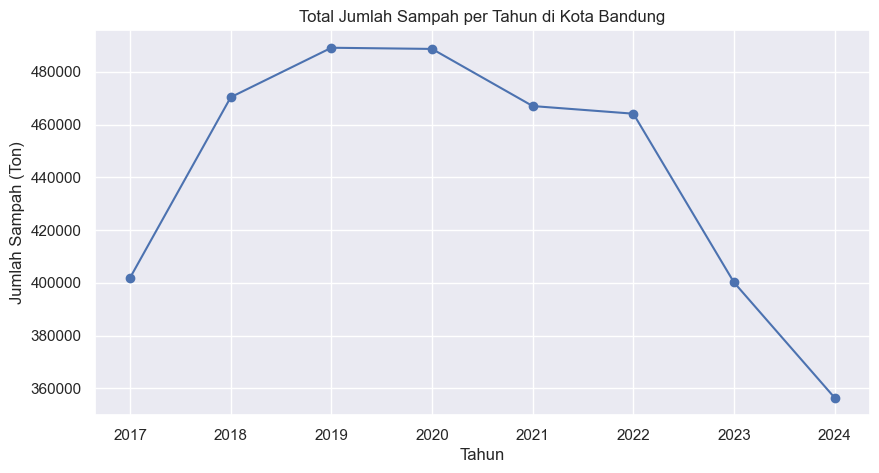

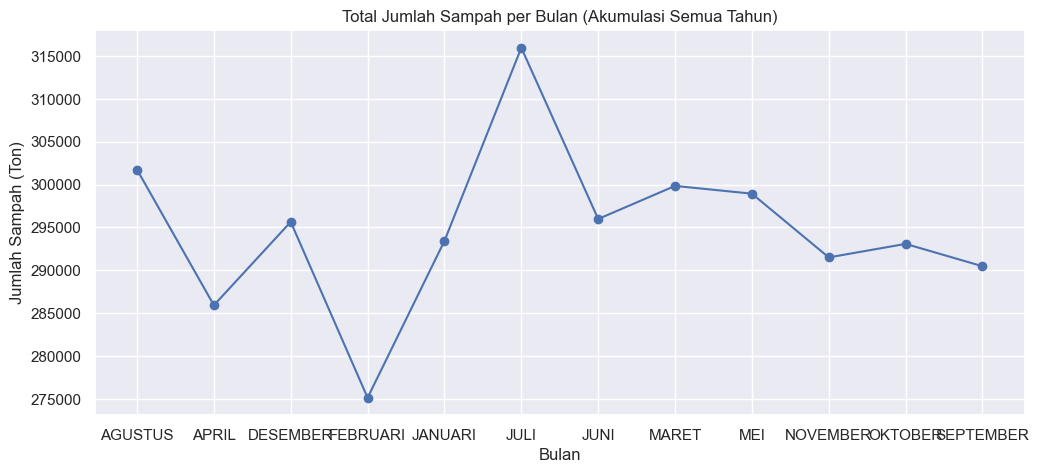

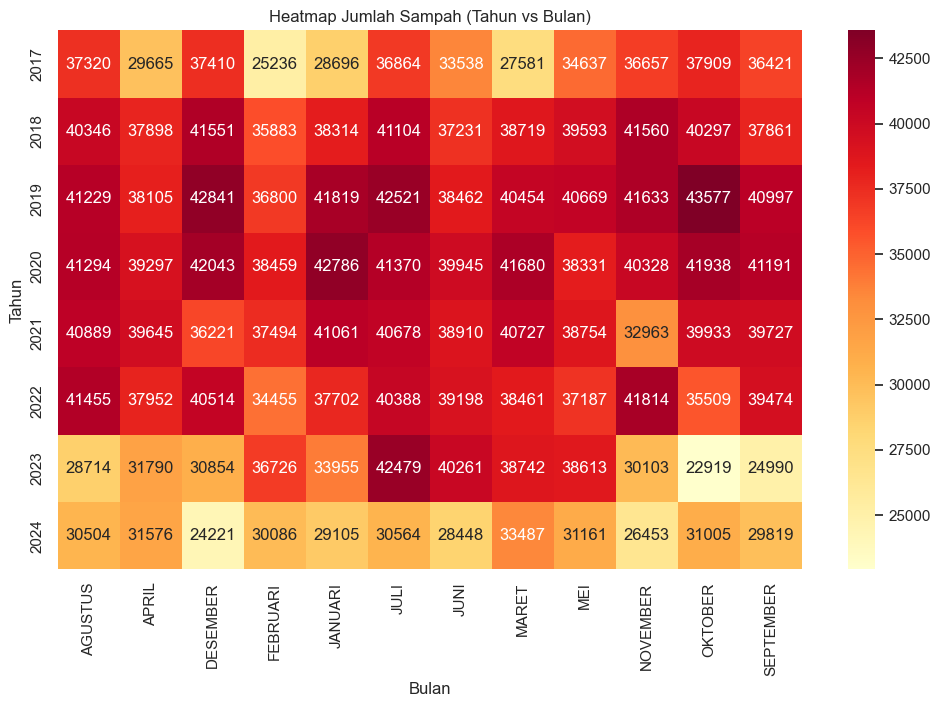

In [ ]:
# ============================================================
# 3. ANALISIS AWAL DATA
# ============================================================

# Total sampah per tahun
df_tahun = df.groupby("tahun")["jumlah_sampah"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_tahun['tahun'], df_tahun['jumlah_sampah'], marker='o')
plt.title("Total Jumlah Sampah per Tahun di Kota Bandung")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Sampah (Ton)")
plt.grid(True)
plt.show()


# Total sampah per bulan
df_bulan = df.groupby("bulan")["jumlah_sampah"].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df_bulan['bulan'], df_bulan['jumlah_sampah'], marker='o')
plt.title("Total Jumlah Sampah per Bulan (Akumulasi Semua Tahun)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sampah (Ton)")
plt.grid(True)
plt.show()


# Heatmap tahun vs bulan
pivot = df.pivot_table(values="jumlah_sampah", index="tahun", columns="bulan", aggfunc="sum")

plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Heatmap Jumlah Sampah (Tahun vs Bulan)")
plt.xlabel("Bulan")
plt.ylabel("Tahun")
plt.show()


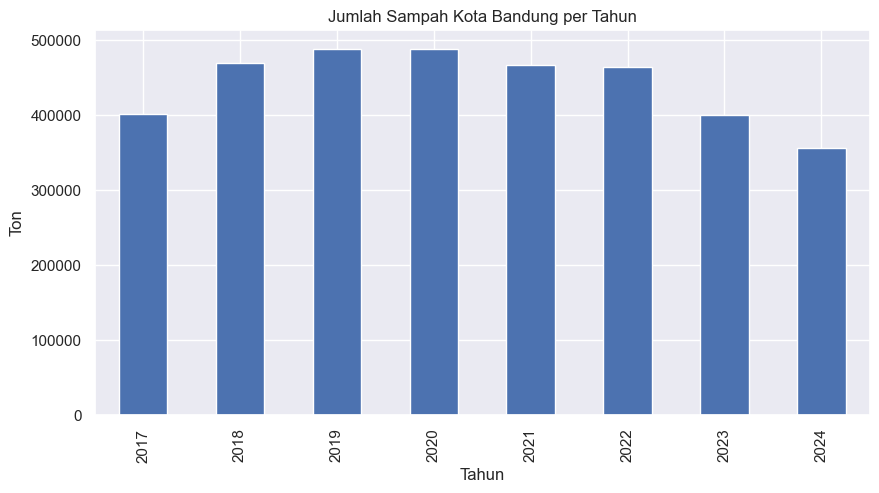

In [44]:
# ============================================================
# 4. FILTER KHUSUS UNTUK KOTA BANDUNG
# ============================================================

df_bandung = df[df['bps_nama_kabupaten_kota'].str.contains("Bandung", case=False)]

plt.figure(figsize=(10,5))
df_bandung.groupby("tahun")["jumlah_sampah"].sum().plot(kind="bar")
plt.title("Jumlah Sampah Kota Bandung per Tahun")
plt.ylabel("Ton")
plt.xlabel("Tahun")
plt.show()

In [ ]:
# ============================================================
# 5. CLD – Variabel Sistem (PERSIAPAN CODING)
# ============================================================
# (Tidak bisa menjadi diagram otomatis, tetapi variabelnya dibuat)

df["timbulan_sampah"] = df["jumlah_sampah"]
df["kapasitas_penanganan_awal"] = df["jumlah_sampah"] * 0.60  # kapasitas saat ini

# Menampilkan beberapa variabel untuk CLD
display(df[["tahun","bulan","timbulan_sampah","kapasitas_penanganan_awal"]].head())



,tahun,bulan,timbulan_sampah,kapasitas_penanganan_awal
0,2017,JANUARI,28695.810,17217.4860
1,2017,FEBRUARI,25235.730,15141.4380
2,2017,MARET,27581.190,16548.7140
3,2017,APRIL,29664.735,17798.8410
4,2017,MEI,34637.092,20782.2552



MODEL STOCK–FLOW (5 BARIS AWAL):


,tahun,bulan,jumlah_sampah,sisa_sampah,akumulasi
0,2017,JANUARI,28695.810,11478.3240,11478.3240
1,2017,FEBRUARI,25235.730,10094.2920,21572.6160
2,2017,MARET,27581.190,11032.4760,32605.0920
3,2017,APRIL,29664.735,11865.8940,44470.9860
4,2017,MEI,34637.092,13854.8368,58325.8228


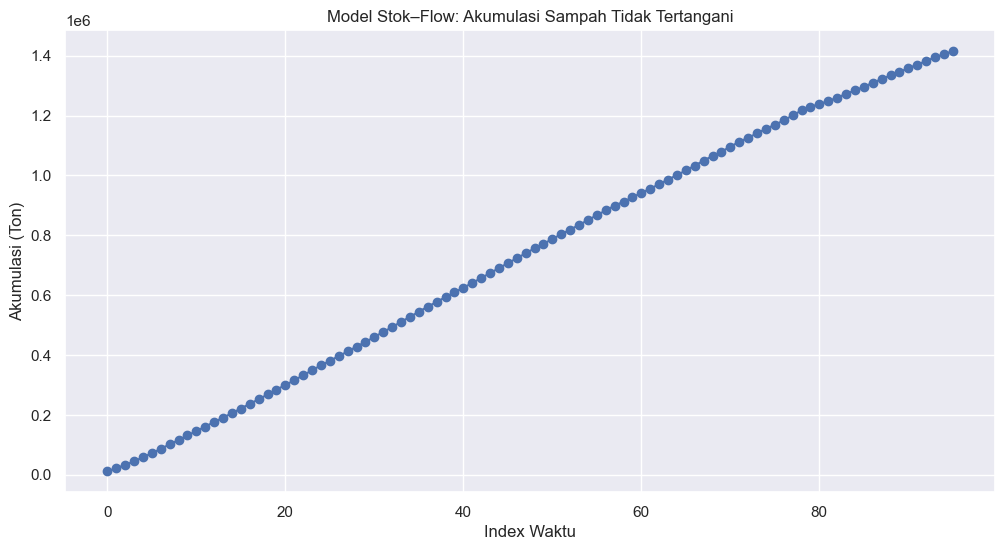

In [46]:
# ============================================================
# 6. SFD – MODEL STOCK-FLOW (MATEMATIS)
# ============================================================

# Flow-out awal (penanganan 60%)
df["penanganan_estimasi"] = df["jumlah_sampah"] * 0.60  

# Sisa sampah (flow-in - flow-out)
df["sisa_sampah"] = df["jumlah_sampah"] - df["penanganan_estimasi"]

# Stock: Akumulasi
df["akumulasi"] = df["sisa_sampah"].cumsum()

print("\nMODEL STOCK–FLOW (5 BARIS AWAL):")
display(df[["tahun","bulan","jumlah_sampah","sisa_sampah","akumulasi"]].head())

# Visualisasi stok akumulasi
plt.figure(figsize=(12,6))
plt.plot(df.index, df['akumulasi'], marker='o')
plt.title("Model Stok–Flow: Akumulasi Sampah Tidak Tertangani")
plt.xlabel("Index Waktu")
plt.ylabel("Akumulasi (Ton)")
plt.grid(True)
plt.show()


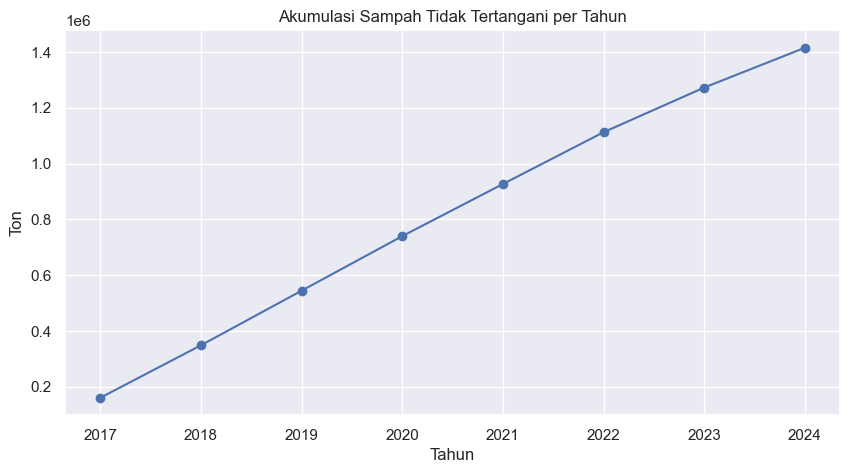

In [47]:
# ============================================================
# 7. AGREGASI TAHUN UNTUK STOCK-FLOW
# ============================================================

df_agg = df.groupby("tahun")["sisa_sampah"].sum().cumsum()

df_agg.plot(figsize=(10,5), marker='o')
plt.title("Akumulasi Sampah Tidak Tertangani per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Ton")
plt.grid(True)
plt.show()

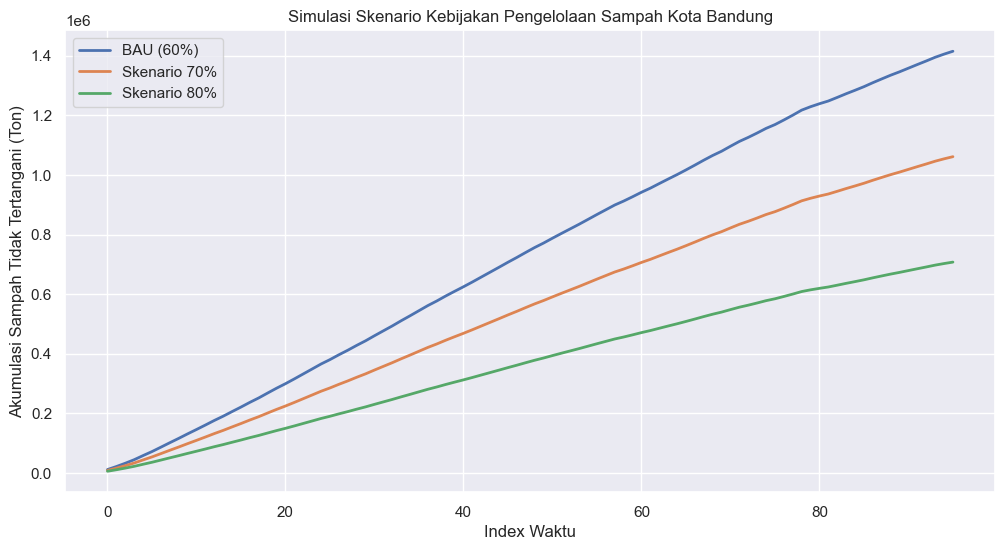

In [48]:
# ============================================================
# 8. SKENARIO KEBIJAKAN (60%, 70%, 80%)
# ============================================================

def skenario(df, persen_penanganan):
    sisa = df["jumlah_sampah"] - df["jumlah_sampah"] * persen_penanganan
    return sisa.cumsum()

df["skn_BAU"] = skenario(df, 0.60)  # kondisi sekarang
df["skn_70"]  = skenario(df, 0.70)  # skenario peningkatan sedang
df["skn_80"]  = skenario(df, 0.80)  # skenario optimal

# Visualisasi skenario
plt.figure(figsize=(12,6))
plt.plot(df["skn_BAU"], label="BAU (60%)", linewidth=2)
plt.plot(df["skn_70"],  label="Skenario 70%", linewidth=2)
plt.plot(df["skn_80"],  label="Skenario 80%", linewidth=2)

plt.title("Simulasi Skenario Kebijakan Pengelolaan Sampah Kota Bandung")
plt.xlabel("Index Waktu")
plt.ylabel("Akumulasi Sampah Tidak Tertangani (Ton)")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# ============================================================
# 9. EXPORT DATA HASIL SIMULASI
# ============================================================

df.to_csv("hasil_simulasi_sampah_bandung.csv", index=False)

print("\nFILE 'hasil_simulasi_kebijakan_sampah_bandung.csv' BERHASIL DIBUAT.")


FILE 'hasil_simulasi_kebijakan_sampah_bandung.csv' BERHASIL DIBUAT.
